# DECISSION TREE MODEL. MODELO B

In [ ]:
#Abrir csv del conjunto de datos limpio

import pandas as pd

df_copy_2_interpolado_copy_sin_outliers = pd.read_csv('dataset_limpio_B.csv', sep=",")
df_copy_2_interpolado_copy_sin_outliers

Año  Mes  Día  Hora  Minuto  B_Optimal - Power DC [W]  \
0       2014    1    1     7      41                  2.388366   
1       2014    1    1     7      42                  2.388366   
2       2014    1    1     7      43                  1.173375   
3       2014    1    1     7      44                  1.278375   
4       2014    1    1     7      45                  1.325625   
...      ...  ...  ...   ...     ...                       ...   
616347  2016   12   29    17      27                  0.731250   
616348  2016   12   29    17      28                  0.731250   
616349  2016   12   29    17      29                  0.731250   
616350  2016   12   29    17      30                  0.731250   
616351  2016   12   29    17      31                  0.731250   

        Ambient Temperature [ºC]  Global Radiation [W/m2]  Ultraviolet [W/m2]  \
0                       9.700000                 7.131149            0.751824   
1                       9.700000                 7.040442            0.781930   
2                       9.700000                 6.594407            0.813929   
3                       9.700000                 7.358729            0.849919   
4                       9.700000                 7.470711            0.886891   
...                          ...                      ...                 ...   
616347                 15.200000                 6.546354            0.836866   
616348                 15.200000                 6.481665            0.801994   
616349                 15.200000                 4.924317            0.766211   
616350                 15.133332                 5.480427            0.740643   
616351                 15.100000                 4.963671            0.713967   

        Wind Velocity [m/s]  Wind Direction [º]  
0                  0.700000          275.333840  
1                  0.666667          278.503060  
2                  0.616667          284.667120  
3                  0.666667          278.666660  
4                  0.633333          272.666360  
...                     ...                 ...  
616347             0.683333           90.670424  
616348             0.833333           87.849608  
616349             0.883333           84.505200  
616350             0.783333           72.378000  
616351             0.916667           81.767752  

[616352 rows x 11 columns]

In [2]:
df_copy_2_interpolado_copy_sin_outliers.isna().sum()

Año                         0
Mes                         0
Día                         0
Hora                        0
Minuto                      0
B_Optimal - Power DC [W]    0
Ambient Temperature [ºC]    0
Global Radiation [W/m2]     0
Ultraviolet [W/m2]          0
Wind Velocity [m/s]         0
Wind Direction [º]          0
dtype: int64

## 1. Particionado datos ML

In [3]:
#PARTICIONADO DEL CONJUNTO DE DATOS: DF
# Construcción de una función que realice el particionado completo

from sklearn.model_selection import train_test_split

def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

df = df_copy_2_interpolado_copy_sin_outliers
# División del conjunto de datos 
train_set, val_set, test_set = train_val_test_split(df)

print("Longitud del conjunto de datos:", len(df))
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del conjunto de datos: 616352
Longitud del Training Set: 369811
Longitud del Validation Set: 123270
Longitud del Test Set: 123271


In [4]:
def preparar_datos(df, prototipo):
    """
    Función para preparar datos de entrenamiento, validación y prueba
    para diferentes prototipos.
    
    Parámetros:
    df (DataFrame): El conjunto de datos de entrada.
    prototipo (str): El prototipo ('A' o 'B').
        
    Retorna:
    tuple: DataFrames X_train, y_train, X_val, y_val, X_test, y_test.
    """
    columna_objetivo = f"{prototipo}_Optimal - Power DC [W]"
    
    X_train = train_set.drop(columna_objetivo, axis=1)
    y_train = train_set[columna_objetivo].copy()
    
    X_val = val_set.drop(columna_objetivo, axis=1)
    y_val = val_set[columna_objetivo].copy()
    
    X_test = test_set.drop(columna_objetivo, axis=1)
    y_test = test_set[columna_objetivo].copy()
    
    return X_train, y_train, X_val, y_val, X_test, y_test

prototipo_seleccionado = 'B'
# Preparar los datos basados en la selección del usuario
X_train, y_train, X_val, y_val, X_test, y_test = preparar_datos(df, prototipo_seleccionado)

X_train = X_train.sort_index()
y_train = y_train.sort_index()
X_val = X_val.sort_index()
y_val = y_val.sort_index()
X_test = X_test.sort_index()
y_test= y_test.sort_index()

Text(0.5, 1.0, 'Pruebas - B_Optimal - Power DC [W]')

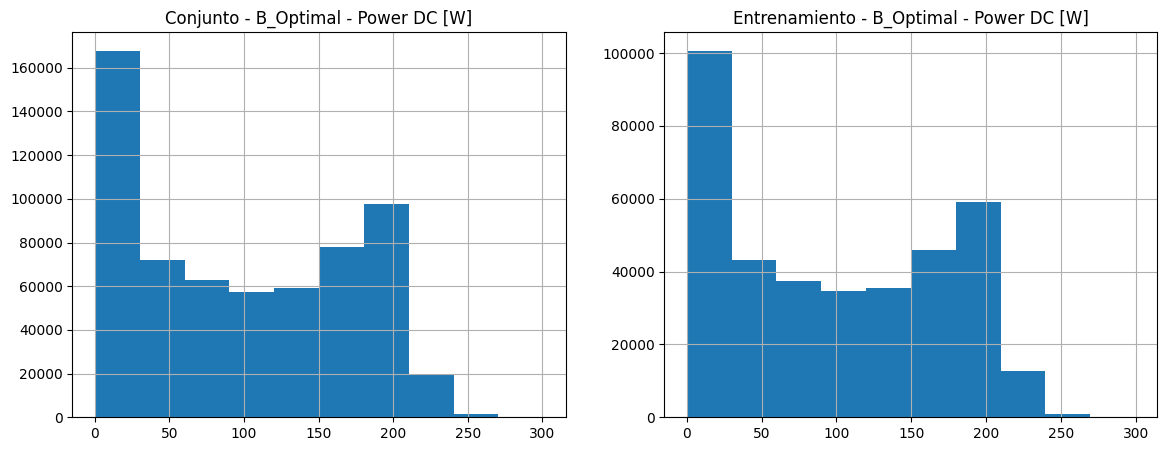

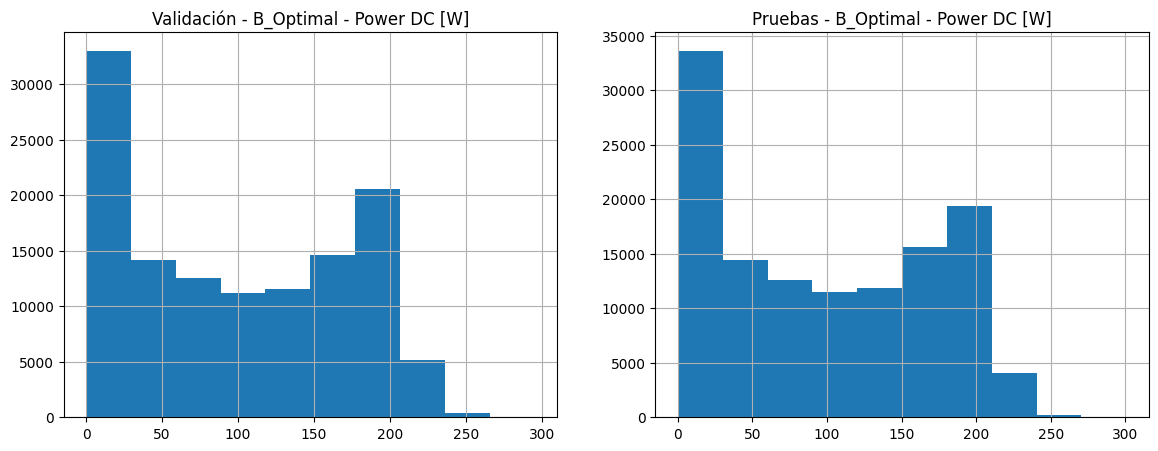

In [5]:
import matplotlib.pyplot as plt
# Comprobación de que stratify mantiene la proporcion de la característica en los conjuntos
plt.figure(figsize=(14, 5))

plt.subplot(121)
df["B_Optimal - Power DC [W]"].hist()
plt.title('Conjunto - B_Optimal - Power DC [W]')

plt.subplot(122)
train_set["B_Optimal - Power DC [W]"].hist()
plt.title('Entrenamiento - B_Optimal - Power DC [W]')


plt.figure(figsize=(14, 5))
plt.subplot(121)
val_set["B_Optimal - Power DC [W]"].hist()
plt.title('Validación - B_Optimal - Power DC [W]')

plt.subplot(122)
test_set["B_Optimal - Power DC [W]"].hist()
plt.title('Pruebas - B_Optimal - Power DC [W]')

#se mantiene la proporción.

# 2. Copia de conjunto particionado

In [6]:
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
X_test_copy = X_test.copy()

y_train_copy = y_train.copy()
y_val_copy = y_val.copy()
y_test_copy = y_test.copy()

# 3. Escalado de los datos
Se escalarán los datos y se comprobará si escalando se obtienen mejores resultados.

In [7]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train_copy)
y_train_scaled = scaler.fit_transform(y_train_copy.values.reshape(-1, 1))
X_val_scaled = scaler.fit_transform(X_val_copy)
y_val_scaled = scaler.fit_transform(y_val_copy.values.reshape(-1, 1))
X_test_scaled = scaler.fit_transform(X_test_copy)
y_test_scaled = scaler.fit_transform(y_test_copy.values.reshape(-1, 1))

# Transformación a un DataFrame de Pandas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_copy.columns, index=X_train_copy.index)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=['B_Optimal - Power DC [W]'], index=y_train_copy.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_copy.columns, index=X_val_copy.index)
y_val_scaled = pd.DataFrame(y_val_scaled, columns=['B_Optimal - Power DC [W]'], index=y_val_copy.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_copy.columns, index=X_test_copy.index)
y_test_scaled = pd.DataFrame(y_test_scaled, columns=['B_Optimal - Power DC [W]'], index=y_test_copy.index)


#DATOS ESCALADOS
# Copiamos el conjunto de datos para no alterar el original
X_train_scaled_copy = X_train_scaled.copy()
y_train_scaled_copy = y_train_scaled.copy()
X_val_scaled_copy = X_val_scaled.copy()
y_val_scaled_copy = y_val_scaled.copy()
X_test_scaled_copy = X_test_scaled.copy()
y_test_scaled_copy = y_test_scaled.copy()
X_train_scaled_copy   #CONJUNTO DE DATOS DE ENTRENAMIENTO ESCALADOS X_train 
X_train_scaled_copy.isna().any()
y_train_scaled_copy   #CONJUNTO DE DATOS DE ENTRENAMIENTO ESCALADOS y_train
y_train_scaled_copy.isna().any()

B_Optimal - Power DC [W]    False
dtype: bool

Tanto los datos escalados como los sin escalar NO tienen valores nulos (NAN)

# 4. Algoritmo:Decission Tree

## Entrenamiento


In [8]:
from sklearn.tree import DecisionTreeRegressor
import time

regr_1 = DecisionTreeRegressor(max_depth=10)
regr_2 = DecisionTreeRegressor(max_depth=16)
regr_3 = DecisionTreeRegressor(max_depth=40)

start_time = time.time()
regr_1.fit(X_train_copy, y_train_copy)
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Decision Tree 10 ramas: {end_time - start_time:.2f} segundos")

start_time = time.time()
regr_2.fit(X_train_copy, y_train_copy)
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Decision Tree 16 ramas: {end_time - start_time:.2f} segundos")

start_time = time.time()
regr_3.fit(X_train_copy, y_train_copy)
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Decision Tree 40 ramas: {end_time - start_time:.2f} segundos")


Tiempo de entrenamiento para el modelo Decision Tree 10 ramas: 2.30 segundos
Tiempo de entrenamiento para el modelo Decision Tree 16 ramas: 3.51 segundos
Tiempo de entrenamiento para el modelo Decision Tree 40 ramas: 5.56 segundos


## Predicción

In [10]:
start_time = time.time()
# Predecimos con el conjunto de datos de entrenamiento
y_train_pred_1 = regr_1.predict(X_train_copy)
# Conjunto de validación
y_val_pred_1 = regr_1.predict(X_val_copy)
#Prececimos con el conjunto de test
y_test_pred_1 = regr_1.predict(X_test_copy)
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Decision Tree 10 ramas: {end_time - start_time:.2f} segundos")

start_time = time.time()
y_train_pred_2 = regr_2.predict(X_train_copy)
y_val_pred_2 = regr_2.predict(X_val_copy)
y_test_pred_2 = regr_2.predict(X_test_copy)
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Decision Tree 16 ramas: {end_time - start_time:.2f} segundos")

start_time = time.time()
y_train_pred_3 = regr_3.predict(X_train_copy)
y_val_pred_3 = regr_3.predict(X_val_copy)
y_test_pred_3 = regr_3.predict(X_test_copy)
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Decision Tree 40 ramas: {end_time - start_time:.2f} segundos")

Tiempo de entrenamiento para el modelo Decision Tree 10 ramas: 0.08 segundos
Tiempo de entrenamiento para el modelo Decision Tree 16 ramas: 0.10 segundos
Tiempo de entrenamiento para el modelo Decision Tree 40 ramas: 0.19 segundos


## Métricas

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluar el modelo con los conjuntos de datos de entrenamiento
mse_train_1 = mean_squared_error(y_train_pred_1, y_train_copy)
r2_train_1 = r2_score(y_train_pred_1, y_train_copy)
mae_train_1 = mean_absolute_error(y_train_pred_1, y_train_copy)

mse_val_1 = mean_squared_error(y_val_pred_1, y_val_copy)
r2_val_1 = r2_score(y_val_pred_1, y_val_copy)
mae_val_1 = mean_absolute_error(y_val_pred_1, y_val_copy)

mse_test_1 = mean_squared_error(y_test_pred_1, y_test_copy)
r2_test_1 = r2_score(y_test_pred_1, y_test_copy)
mae_test_1 = mean_absolute_error(y_test_pred_1, y_test_copy)

print('Max depth = 10:')
print(f"Error Cuadrático Medio (MSE) Train Set: {mse_train_1:.2f}")
print(f"Coeficiente de Determinación (R^2) Train Set: {r2_train_1:.2f}")
print(f"Error Absoluto Medio (MAE) Train Set: {mae_train_1:.2f}")
print(f"Error Cuadrático Medio (MSE) Validation Set: {mse_val_1:.2f}")
print(f"Coeficiente de Determinación (R^2) Validation Set: {r2_val_1:.2f}")
print(f"Error Absoluto Medio (MAE) Validation Set: {mae_val_1:.2f}")
print(f"Error Cuadrático Medio (MSE) Test Set: {mse_test_1:.2f}")
print(f"Coeficiente de Determinación (R^2) Test Set: {r2_test_1:.2f}")
print(f"Error Absoluto Medio (MAE) Test Set: {mae_test_1:.2f}")

mse_train_2 = mean_squared_error(y_train_pred_2, y_train_copy)
r2_train_2 = r2_score(y_train_pred_2, y_train_copy)
mae_train_2 = mean_absolute_error(y_train_pred_2, y_train_copy)

mse_val_2 = mean_squared_error(y_val_pred_2, y_val_copy)
r2_val_2 = r2_score(y_val_pred_2, y_val_copy)
mae_val_2 = mean_absolute_error(y_val_pred_2, y_val_copy)

mse_test_2 = mean_squared_error(y_test_pred_2, y_test_copy)
r2_test_2 = r2_score(y_test_pred_2, y_test_copy)
mae_test_2 = mean_absolute_error(y_test_pred_2, y_test_copy)

print('\nMax depth = 16:')
print(f"Error Cuadrático Medio (MSE) Train Set: {mse_train_2:.2f}")
print(f"Coeficiente de Determinación (R^2) Train Set: {r2_train_2:.2f}")
print(f"Error Absoluto Medio (MAE) Train Set: {mae_train_2:.2f}")
print(f"Error Cuadrático Medio (MSE) Validation Set: {mse_val_2:.2f}")
print(f"Coeficiente de Determinación (R^2) Validation Set: {r2_val_2:.2f}")
print(f"Error Absoluto Medio (MAE) Validation Set: {mae_val_2:.2f}")
print(f"Error Cuadrático Medio (MSE) Test Set: {mse_test_2:.2f}")
print(f"Coeficiente de Determinación (R^2) Test Set: {r2_test_2:.2f}")
print(f"Error Absoluto Medio (MAE) Test Set: {mae_test_2:.2f}")

mse_train_3 = mean_squared_error(y_train_pred_3, y_train_copy)
r2_train_3 = r2_score(y_train_pred_3, y_train_copy)
mae_train_3 = mean_absolute_error(y_train_pred_3, y_train_copy)

mse_val_3 = mean_squared_error(y_val_pred_3, y_val_copy)
r2_val_3 = r2_score(y_val_pred_3, y_val_copy)
mae_val_3 = mean_absolute_error(y_val_pred_3, y_val_copy)

mse_test_3 = mean_squared_error(y_test_pred_3, y_test_copy)
r2_test_3 = r2_score(y_test_pred_3, y_test_copy)
mae_test_3 = mean_absolute_error(y_test_pred_3, y_test_copy)

print('\nMax depth = 40:')
print(f"Error Cuadrático Medio (MSE) Train Set: {mse_train_3:.2f}")
print(f"Coeficiente de Determinación (R^2) Train Set: {r2_train_3:.2f}")
print(f"Error Absoluto Medio (MAE) Train Set: {mae_train_3:.2f}")
print(f"Error Cuadrático Medio (MSE) Validation Set: {mse_val_3:.2f}")
print(f"Coeficiente de Determinación (R^2) Validation Set: {r2_val_3:.2f}")
print(f"Error Absoluto Medio (MAE) Validation Set: {mae_val_3:.2f}")
print(f"Error Cuadrático Medio (MSE) Test Set: {mse_test_3:.2f}")
print(f"Coeficiente de Determinación (R^2) Test Set: {r2_test_3:.2f}")
print(f"Error Absoluto Medio (MAE) Test Set: {mae_test_3:.2f}")


Max depth = 10:
Error Cuadrático Medio (MSE) Train Set: 511.66
Coeficiente de Determinación (R^2) Train Set: 0.89
Error Absoluto Medio (MAE) Train Set: 12.64
Error Cuadrático Medio (MSE) Validation Set: 527.07
Coeficiente de Determinación (R^2) Validation Set: 0.89
Error Absoluto Medio (MAE) Validation Set: 12.83
Error Cuadrático Medio (MSE) Test Set: 524.48
Coeficiente de Determinación (R^2) Test Set: 0.89
Error Absoluto Medio (MAE) Test Set: 12.80

Max depth = 16:
Error Cuadrático Medio (MSE) Train Set: 194.20
Coeficiente de Determinación (R^2) Train Set: 0.96
Error Absoluto Medio (MAE) Train Set: 6.37
Error Cuadrático Medio (MSE) Validation Set: 373.79
Coeficiente de Determinación (R^2) Validation Set: 0.93
Error Absoluto Medio (MAE) Validation Set: 8.57
Error Cuadrático Medio (MSE) Test Set: 370.23
Coeficiente de Determinación (R^2) Test Set: 0.93
Error Absoluto Medio (MAE) Test Set: 8.52

Max depth = 40:
Error Cuadrático Medio (MSE) Train Set: 0.05
Coeficiente de Determinación (R^

In [12]:
import pandas as pd

# Crear un DataFrame con los resultados de las métricas
resultados = pd.DataFrame({
    'Conjunto de Datos': ['Train', 'Validation', 'Test'],
    'MSE DT10': [mse_train_1, mse_val_1, mse_test_1],
    'R^2 DT10': [r2_train_1, r2_val_1, r2_test_1],
    'MAE DT10': [mae_train_1, mae_val_1, mae_test_1],
    'MSE DT16': [mse_train_2, mse_val_2, mse_test_2],
    'R^2 DT16': [r2_train_2, r2_val_2, r2_test_2],
    'MAE DT16': [mae_train_2, mae_val_2, mae_test_2],
    'MSE DT40': [mse_train_3, mse_val_3, mse_test_3],
    'R^2 DT40': [r2_train_3, r2_val_3, r2_test_3],
    'MAE DT40': [mae_train_3, mae_val_3, mae_test_3]
})

# Mostrar la tabla de resultados
resultados

Conjunto de Datos    MSE DT10  R^2 DT10   MAE DT10    MSE DT16  R^2 DT16  \
0             Train  511.658057  0.891990  12.640348  194.195221  0.961581   
1        Validation  527.065741  0.888725  12.830425  373.789233  0.925987   
2              Test  524.482118  0.889281  12.803946  370.227167  0.926785   

   MAE DT16    MSE DT40  R^2 DT40  MAE DT40  
0  6.368589    0.049664  0.999991  0.007537  
1  8.566235  469.260440  0.910633  7.964359  
2  8.515770  468.676054  0.910790  7.939908

## Gráficas

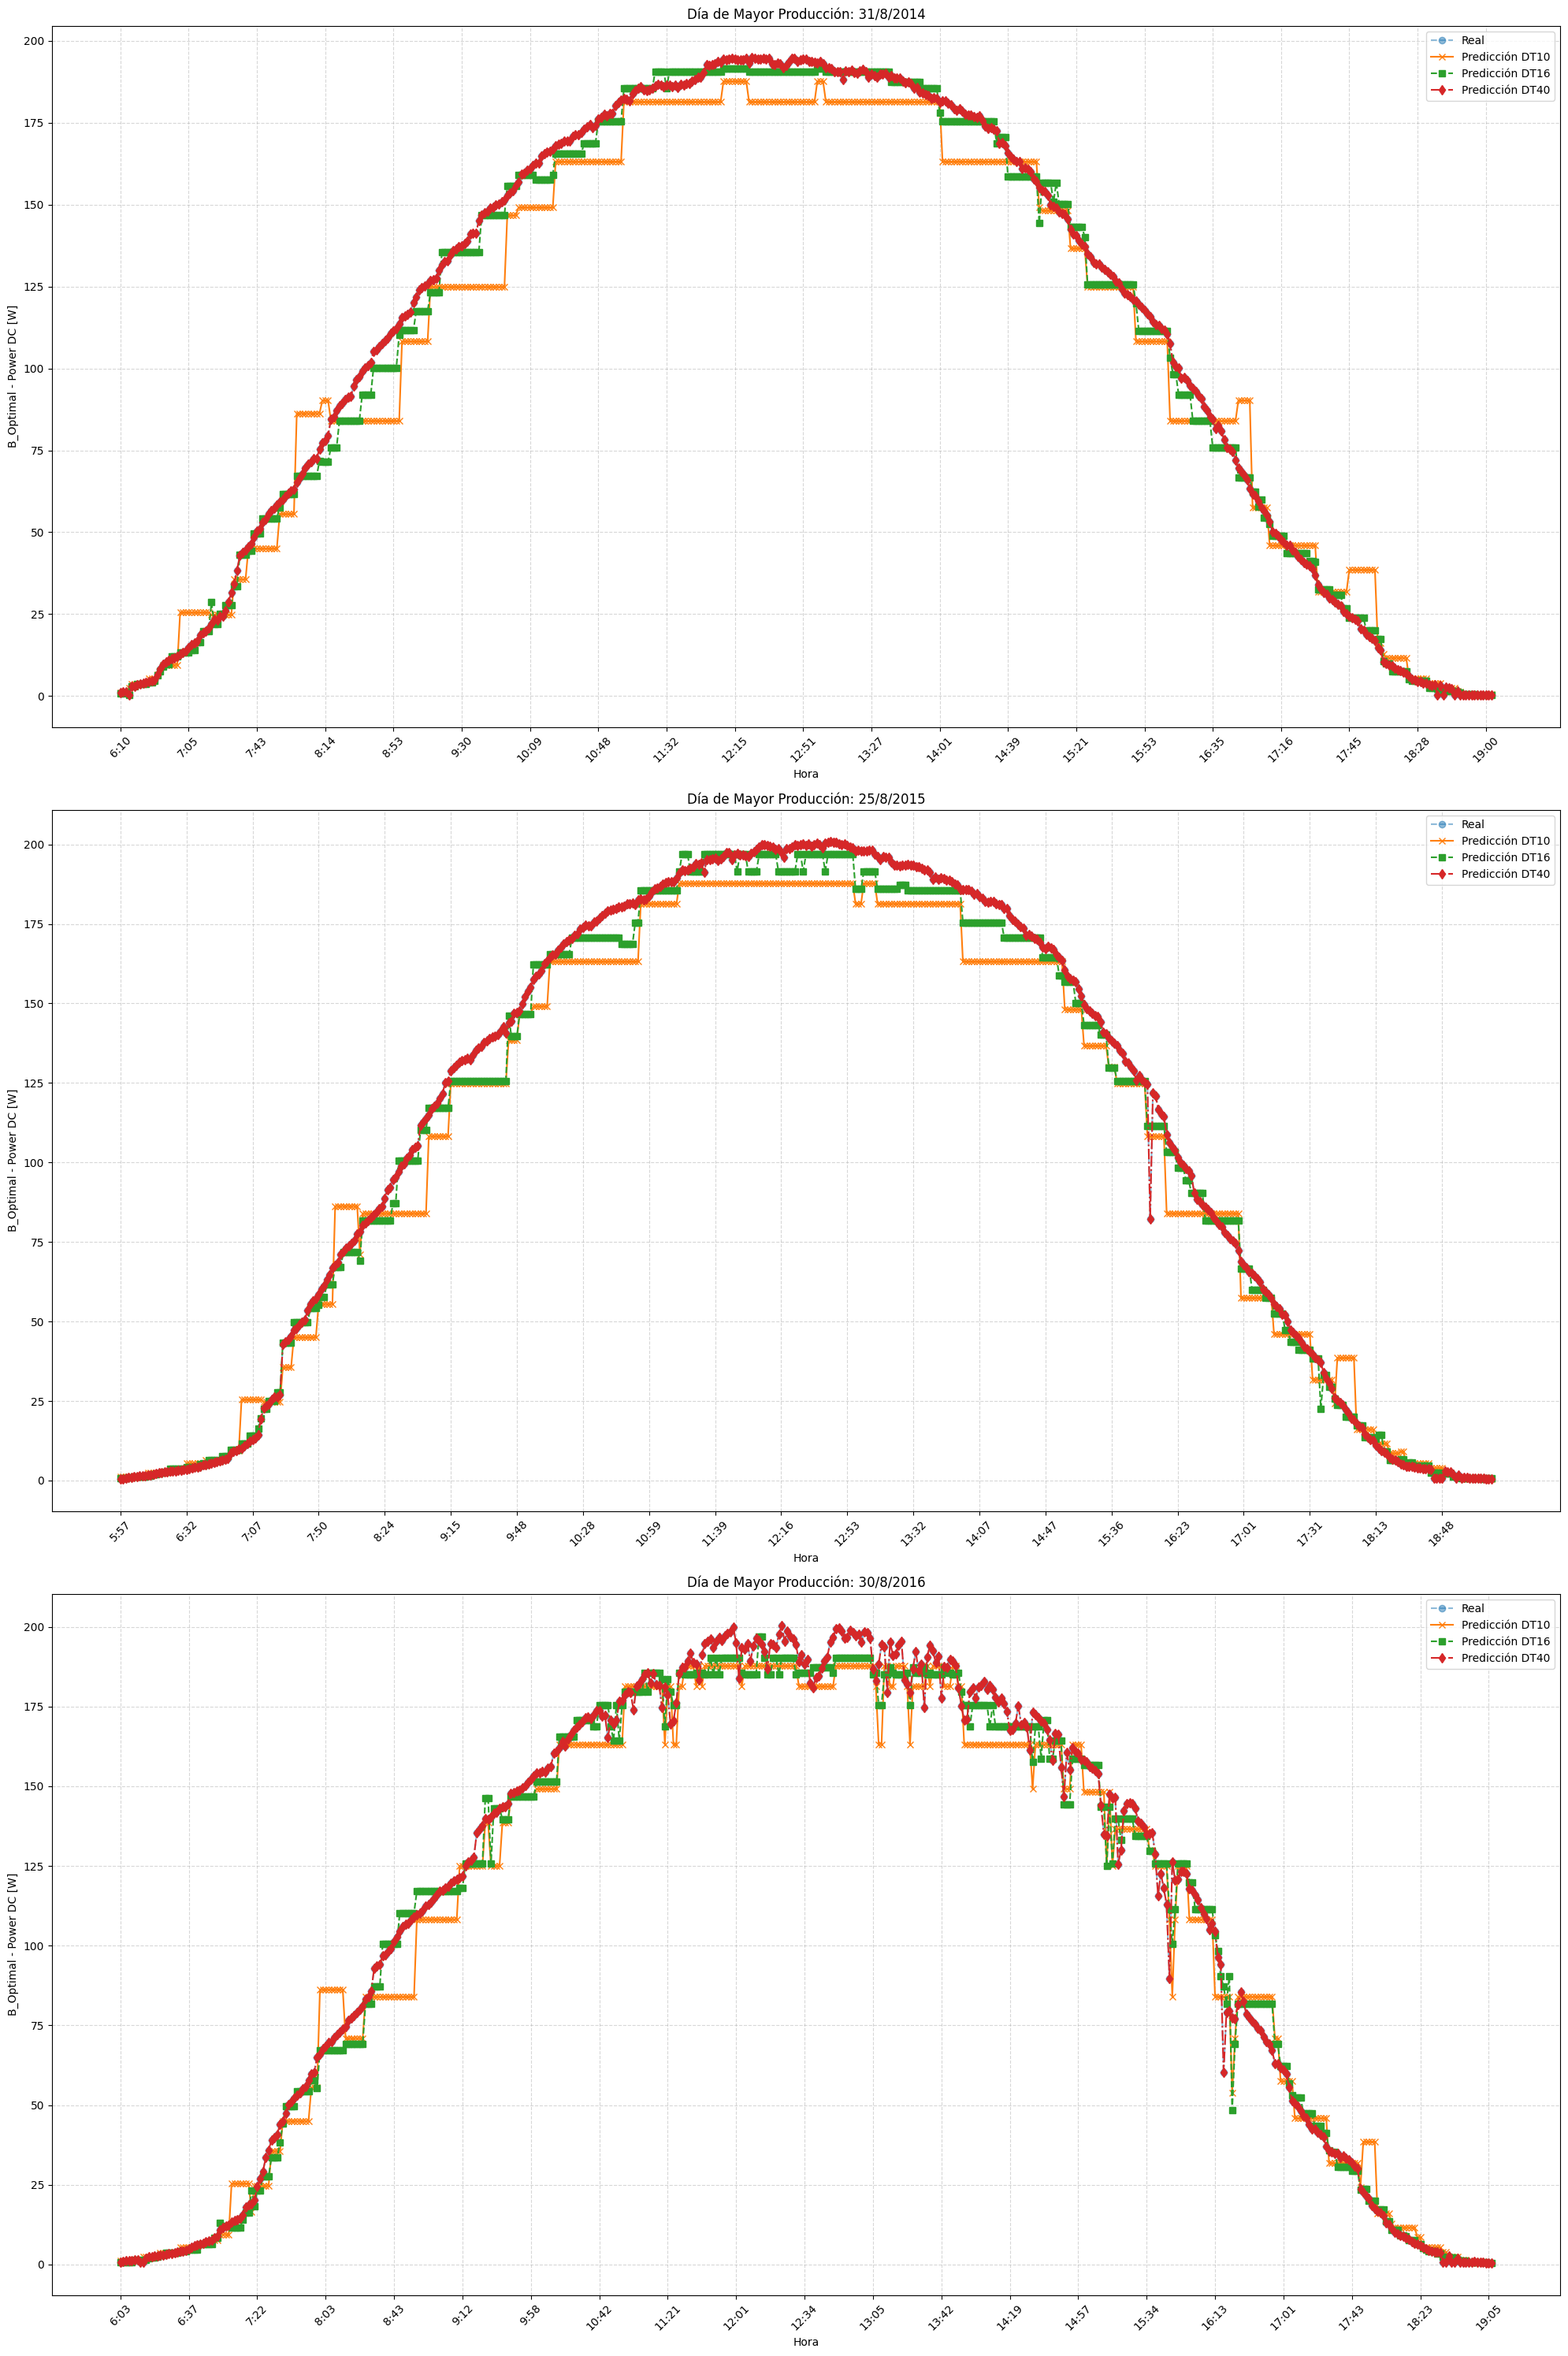

In [13]:
# Crear un DataFrame con los valores reales y predichos para DT10, DT16 y DT40
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción DT10': y_train_pred_1.flatten(),
    'Predicción DT16': y_train_pred_2.flatten(),
    'Predicción DT40': y_train_pred_3.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(3, 1, figsize=(20, 30))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año
    ax = axes[i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción DT10'], label='Predicción DT10', marker="x", linestyle="-")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción DT16'], label='Predicción DT16', marker="s", linestyle="--")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción DT40'], label='Predicción DT40', marker="d", linestyle="-.")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year}')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()


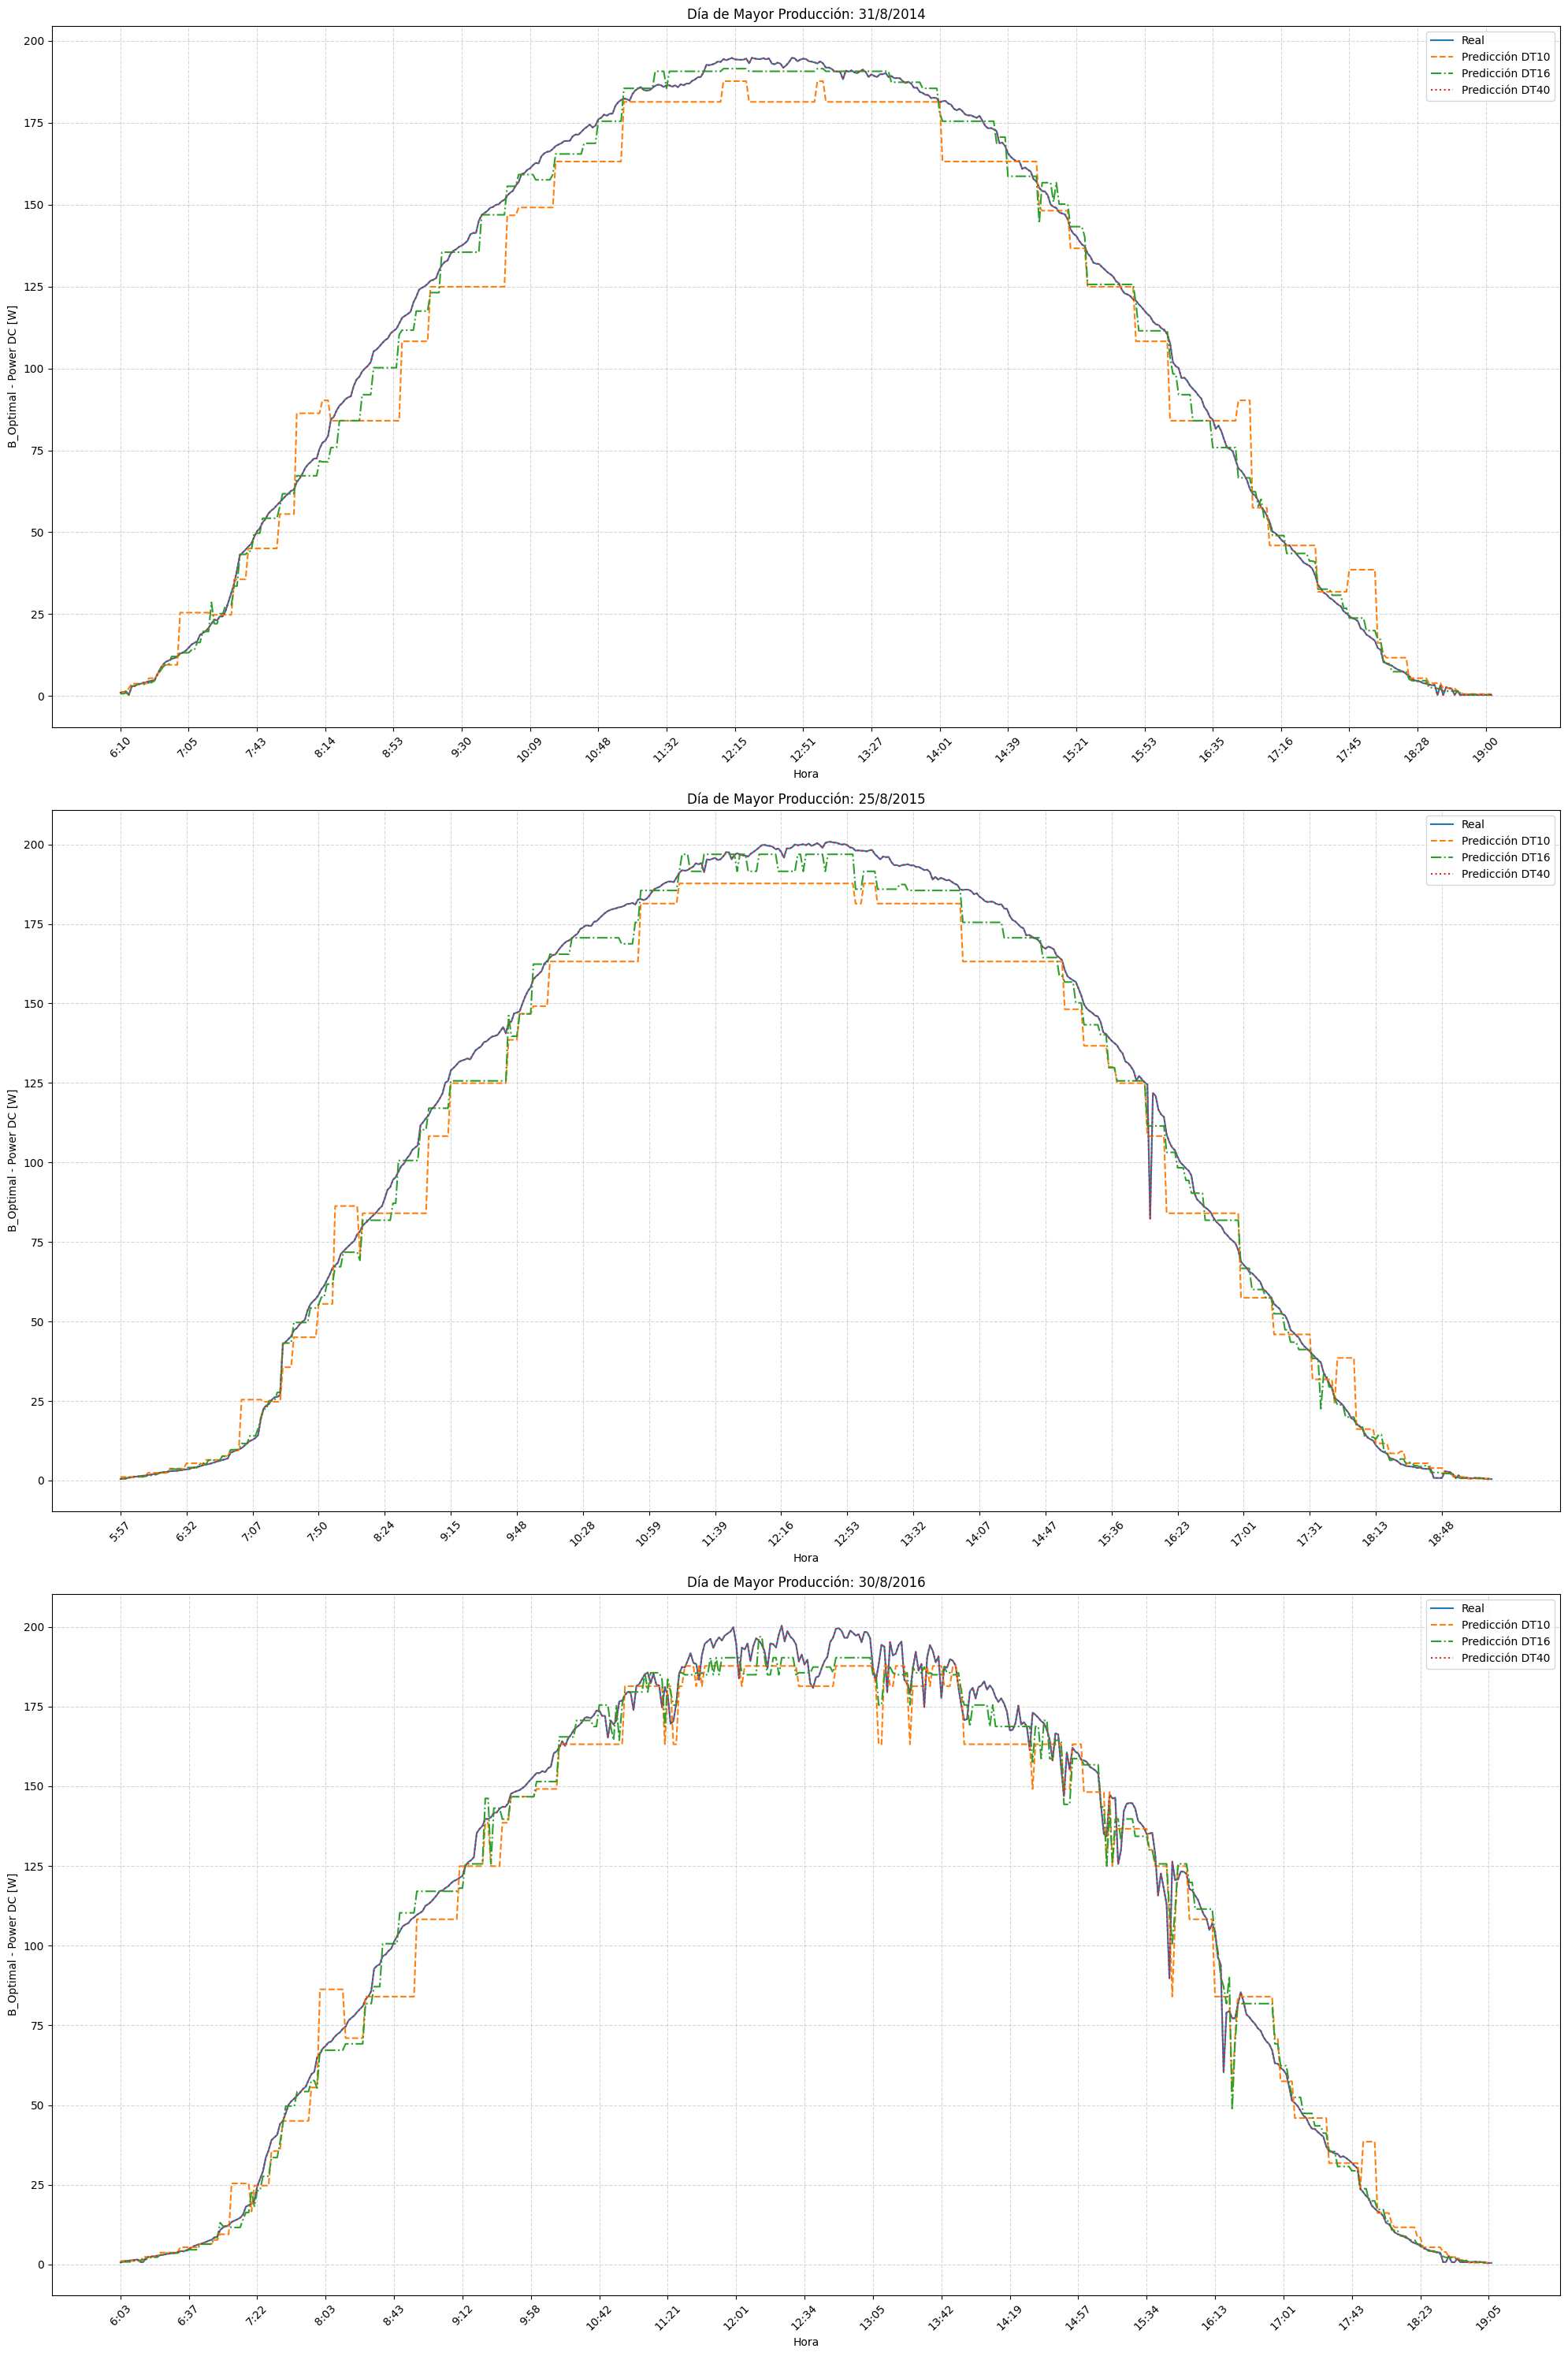

In [14]:
# Crear un DataFrame con los valores reales y predichos para DT10, DT16 y DT40
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción DT10': y_train_pred_1.flatten(),
    'Predicción DT16': y_train_pred_2.flatten(),
    'Predicción DT40': y_train_pred_3.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(3, 1, figsize=(20, 30))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año
    ax = axes[i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción DT10'], label='Predicción DT10', linestyle="--")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción DT16'], label='Predicción DT16', linestyle="-.")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción DT40'], label='Predicción DT40', linestyle=":")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year}')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()


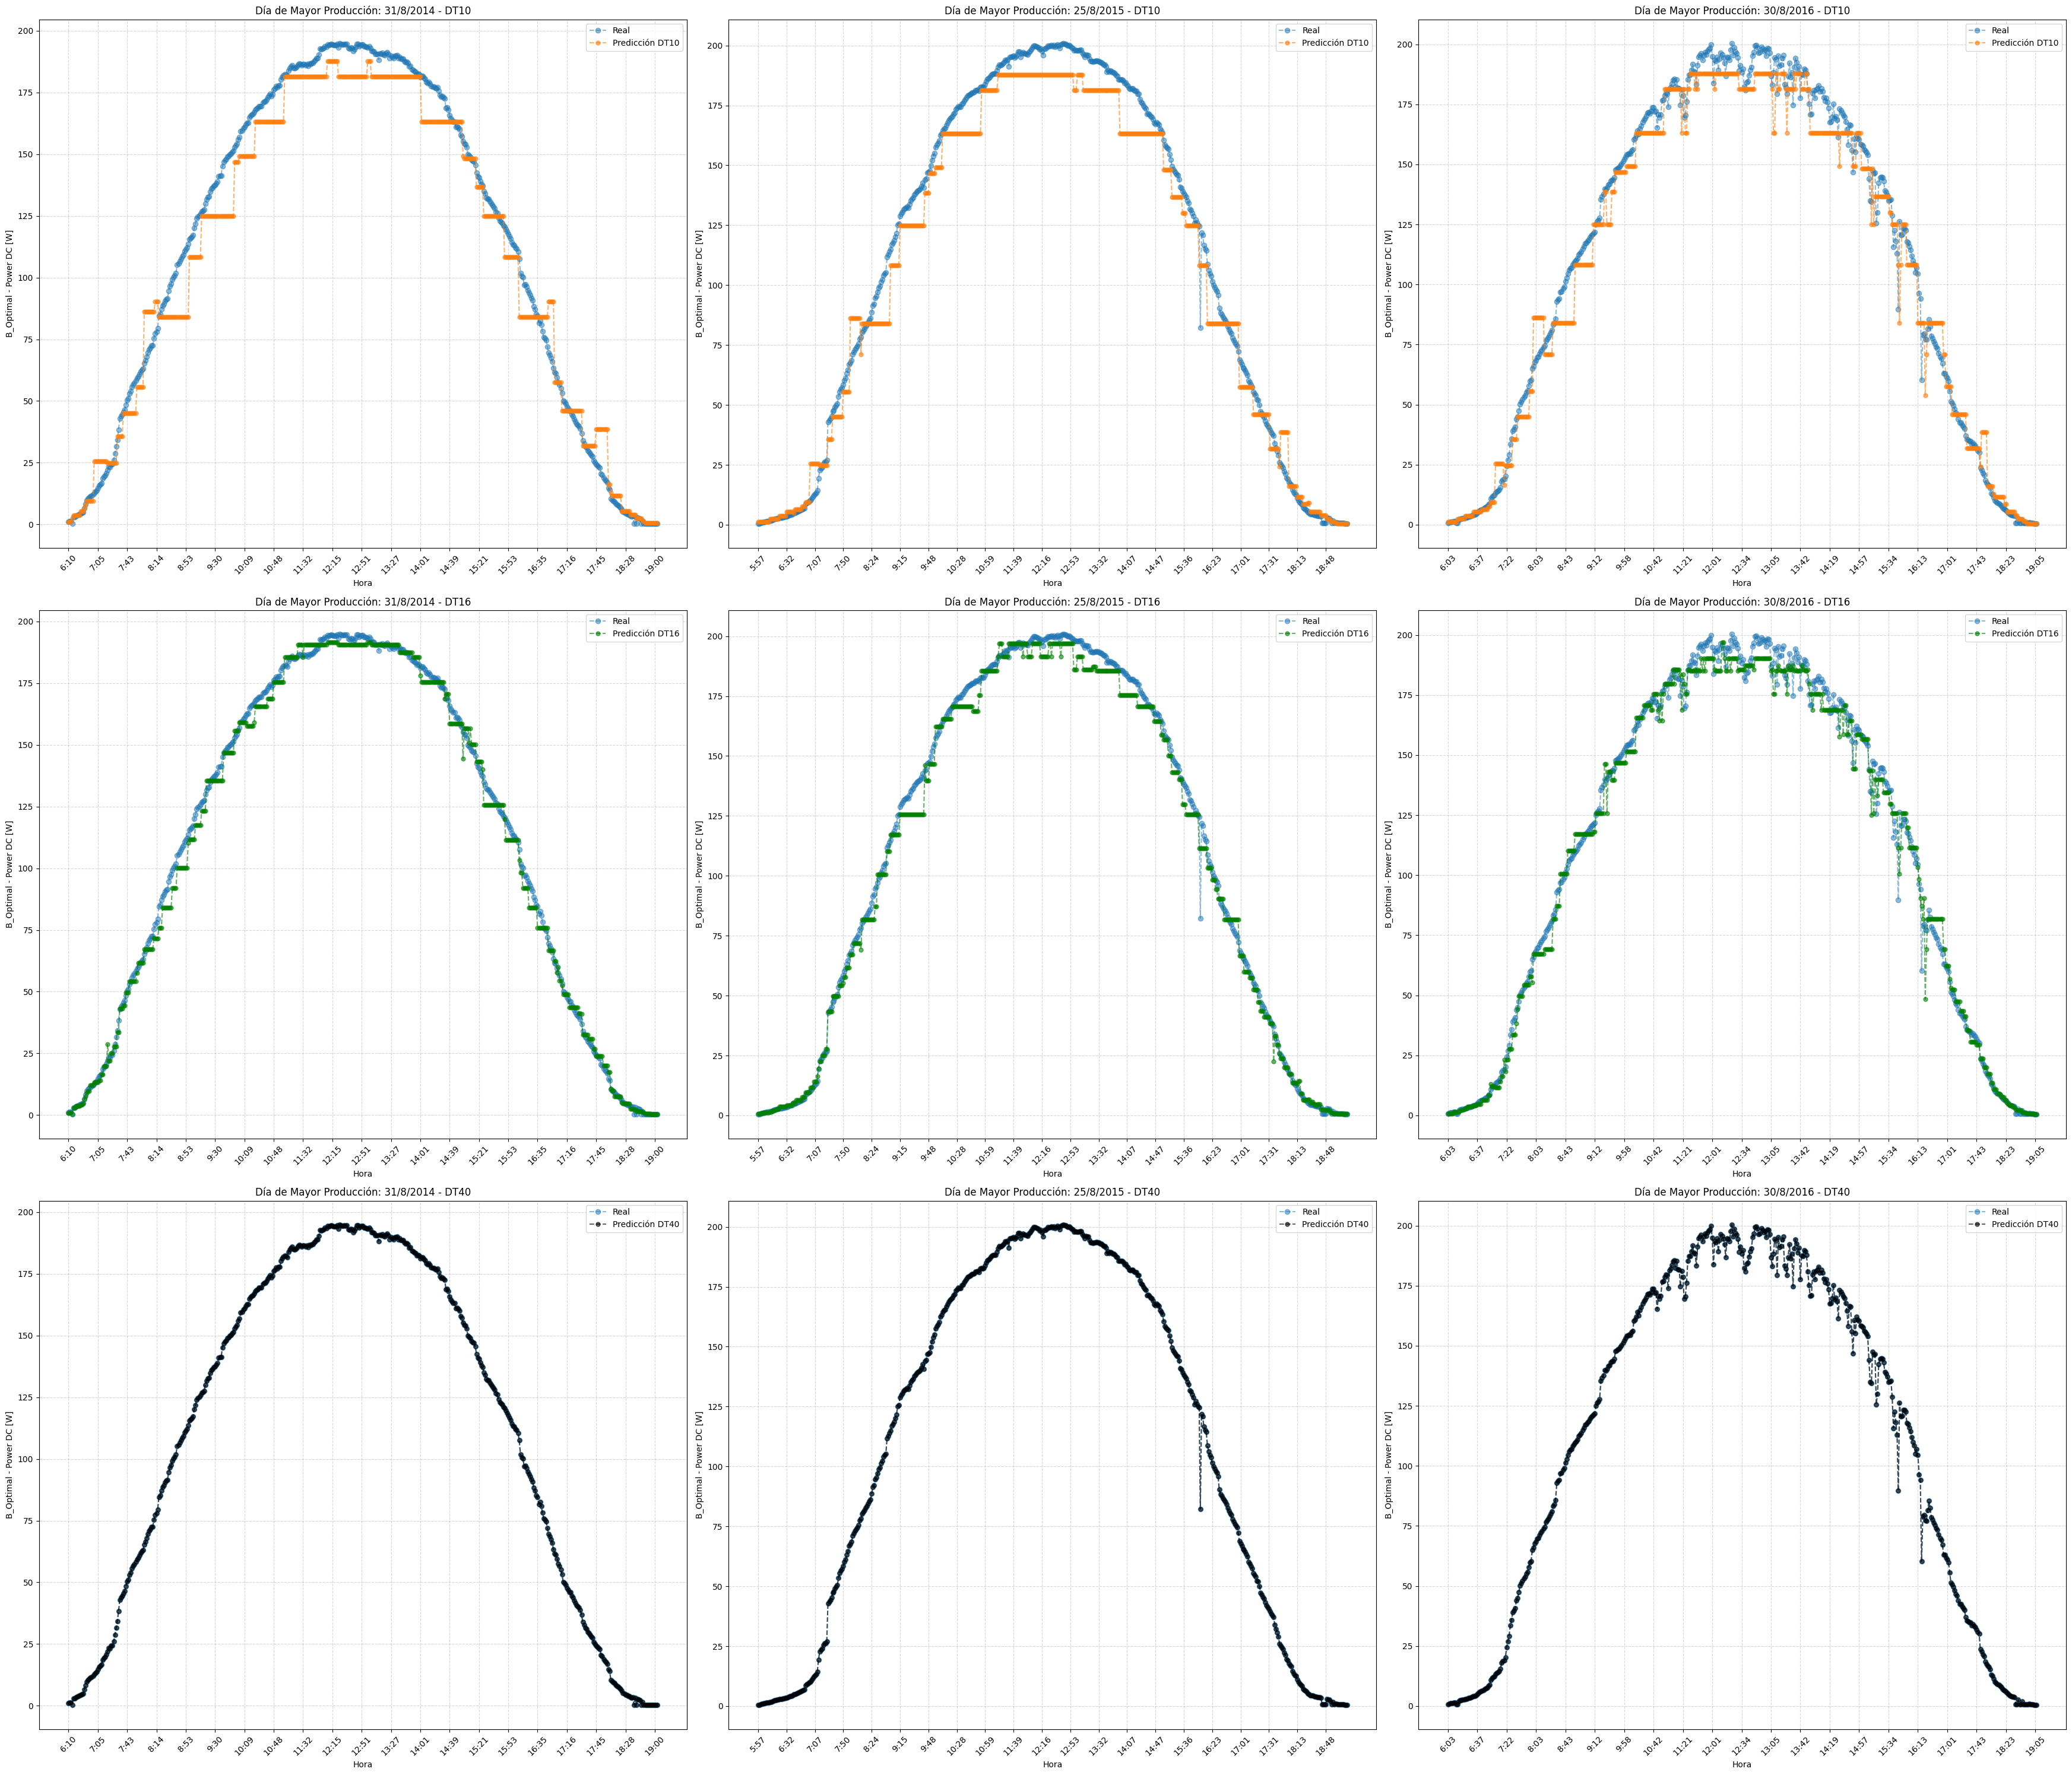

In [15]:
# Crear un DataFrame con los valores reales y predichos para DT10, DT16 y DT40
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción DT10': y_train_pred_1.flatten(),
    'Predicción DT16': y_train_pred_2.flatten(),
    'Predicción DT40': y_train_pred_3.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(3, 3, figsize=(35, 30))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año - DT10
    ax = axes[0, i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción DT10'], label='Predicción DT10', marker="o", linestyle="dashed", alpha=0.6, markersize=5)
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - DT10')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - DT16
    ax = axes[1, i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción DT16'], label='Predicción DT16', marker="o", linestyle="dashed", color='green', alpha=0.6, markersize=5)
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - DT16')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - DT40
    ax = axes[2, i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción DT40'], label='Predicción DT40', marker="o", linestyle="dashed", color='black', alpha=0.6, markersize=5)
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - DT40')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()


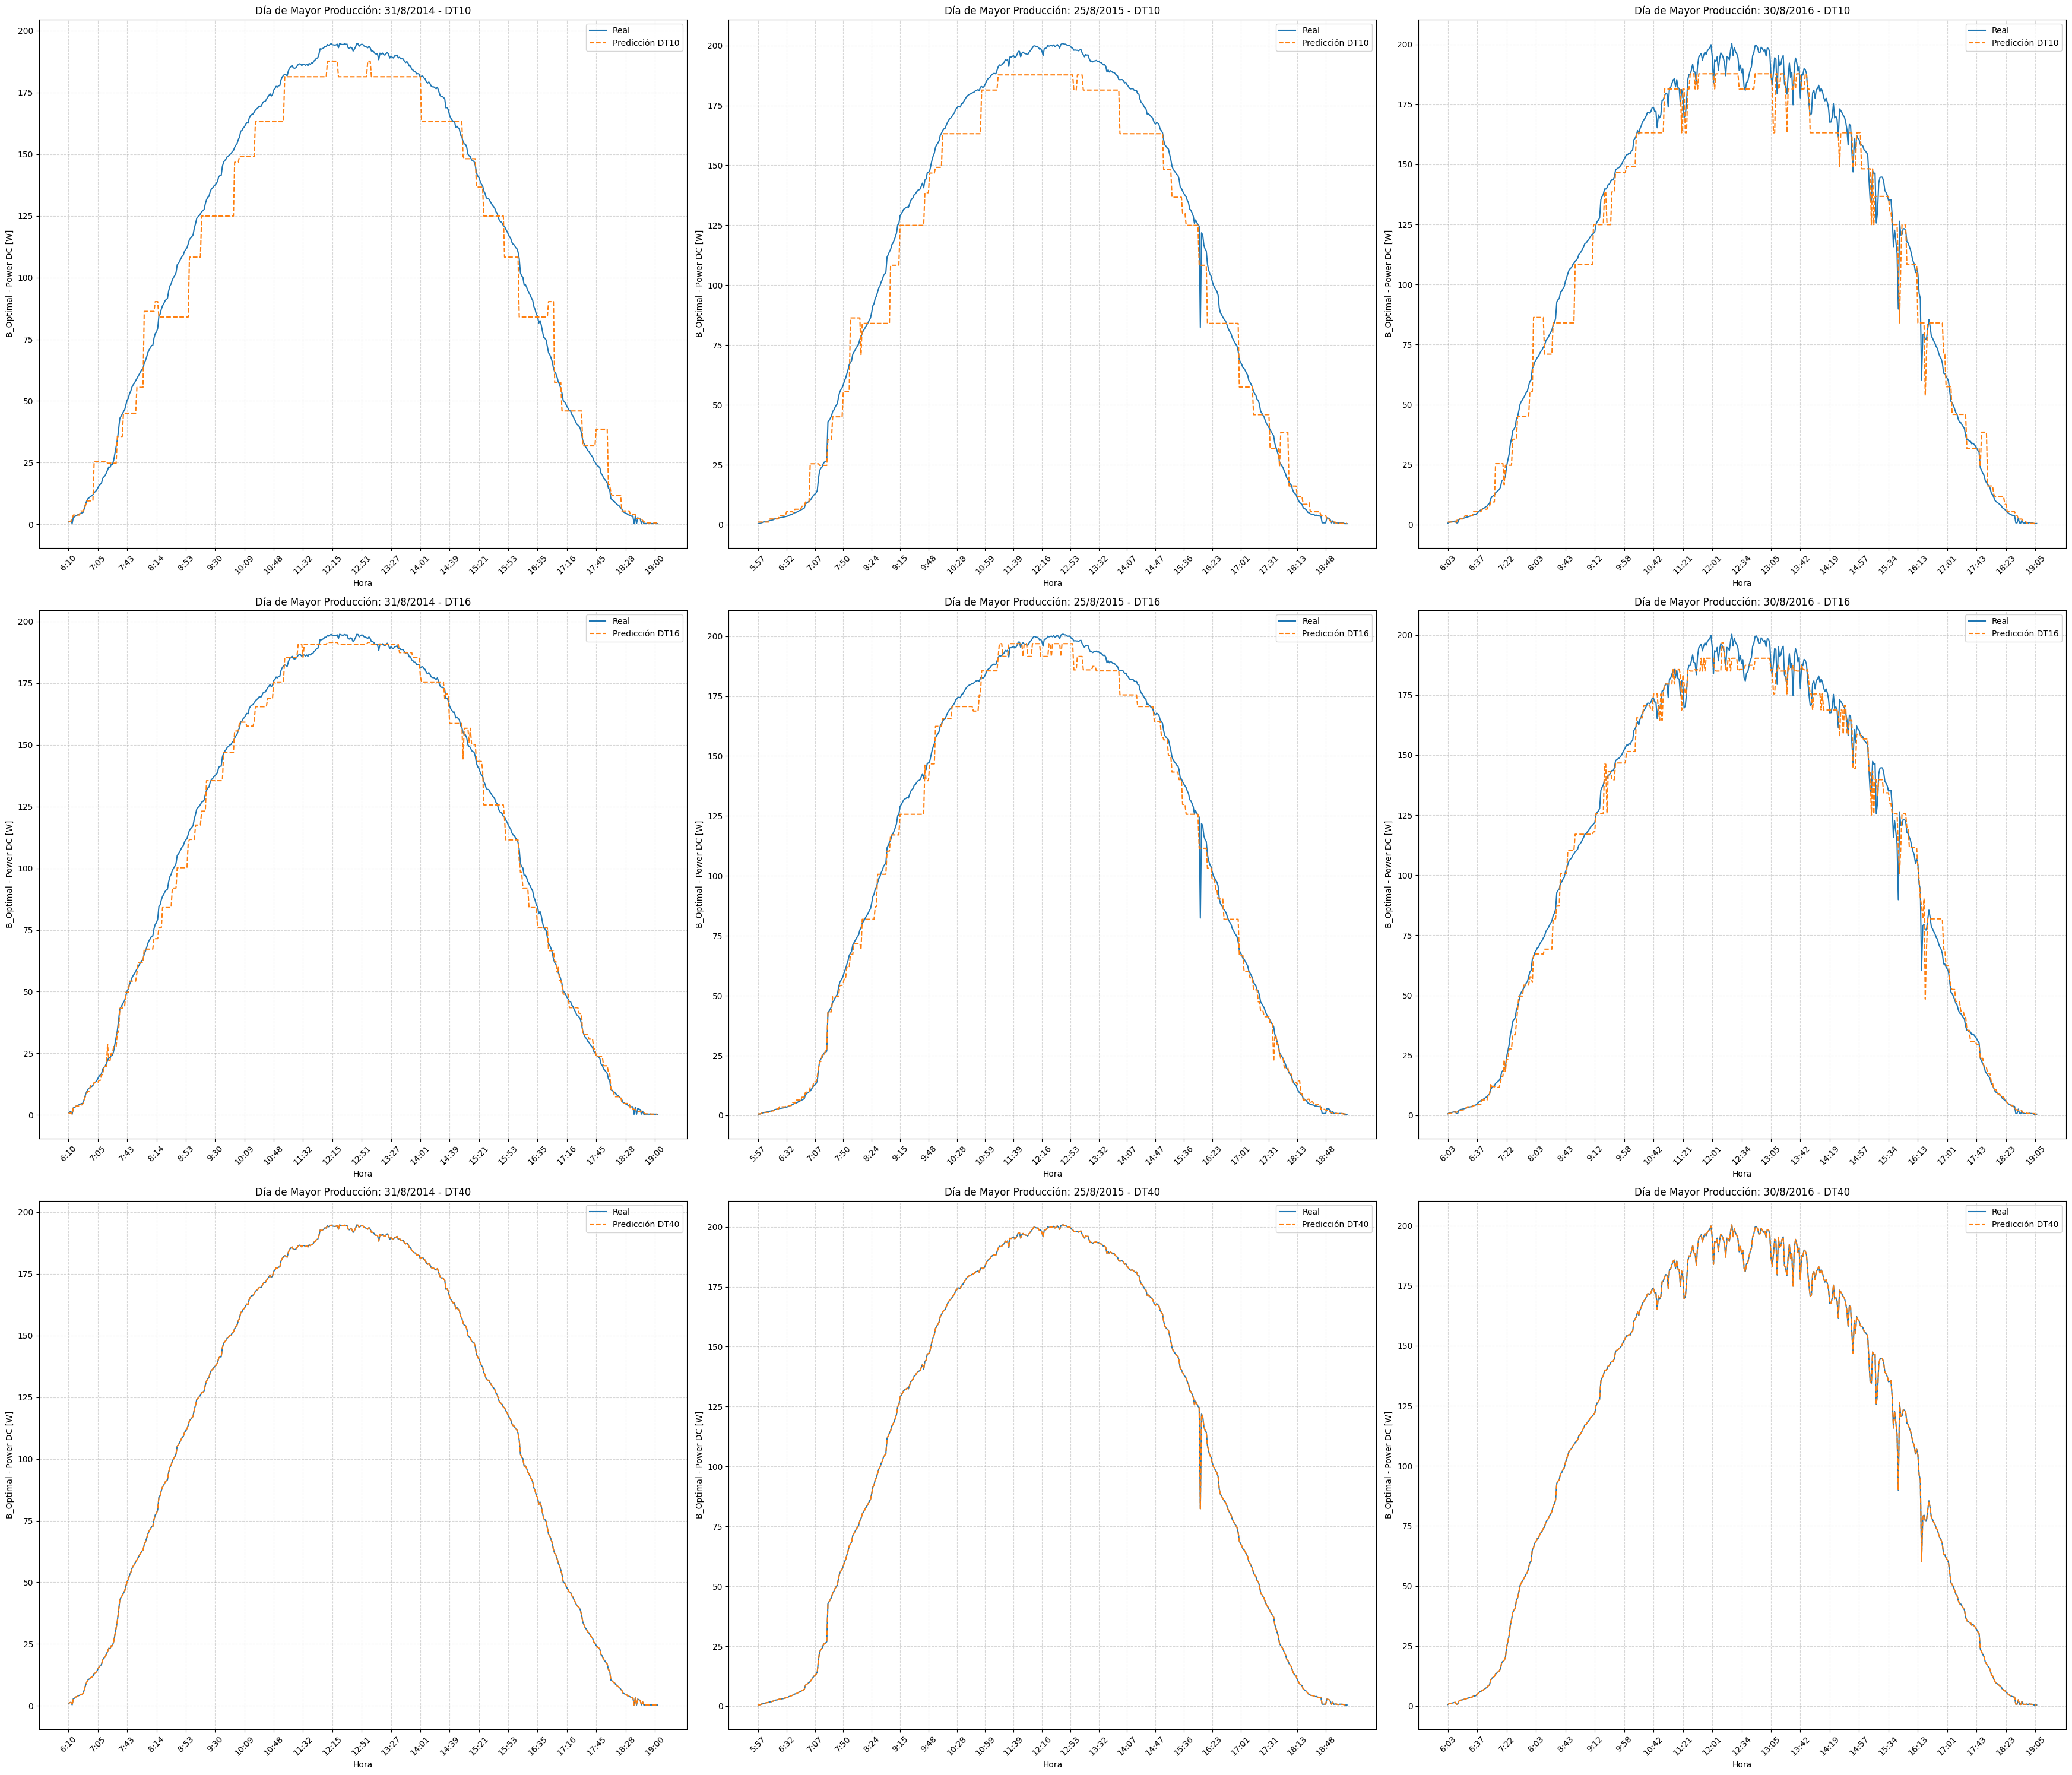

In [16]:
# Crear un DataFrame con los valores reales y predichos para DT10, DT16 y DT40
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción DT10': y_train_pred_1.flatten(),
    'Predicción DT16': y_train_pred_2.flatten(),
    'Predicción DT40': y_train_pred_3.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(3, 3, figsize=(35, 30))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año - DT10
    ax = axes[0, i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción DT10'], label='Predicción DT10', linestyle="--")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - DT10')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - DT16
    ax = axes[1, i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción DT16'], label='Predicción DT16', linestyle="--")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - DT16')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - DT40
    ax = axes[2, i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción DT40'], label='Predicción DT40', linestyle="--")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - DT40')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()


# Guardar el Modelo

In [ ]:
#Guardar el modelo de DT16
import joblib

joblib.dump(regr_2, 'model_B_DT16.pkl')

# 6. Energía

In [18]:
import numpy as np
import pandas as pd

# Implementación manual del método de Simpson
def simpson_manual(y, x):
    n = len(x)
    if n < 2:
        raise ValueError("Se necesitan al menos dos puntos para calcular el área.")

    if len(y) != n:
        raise ValueError("El tamaño de los vectores x e y debe ser el mismo.")

    h = (x[-1] - x[0]) / (n - 1)  # Tamaño de los intervalos

    # Aplicar la regla de Simpson
    suma = y[0] + y[-1]  # y0 + yn
    for i in range(1, n - 1):
        if i % 2 == 0:
            suma += 2 * y[i]  # Coeficiente 2 para términos pares
        else:
            suma += 4 * y[i]  # Coeficiente 4 para términos impares
    area = h / 3 * suma
    return area

comparacion = pd.DataFrame({
    'Real': y_test_copy.values.flatten(),
    'Predicción DT16': y_test_pred_2.flatten(),
    'Mes': X_test_copy['Mes'].values.flatten(),
    'Año': X_test_copy['Año'].values.flatten(),
    'Día': X_test_copy['Día'].values.flatten(),
    'Hora': X_test_copy['Hora'].values.flatten(),
    'Minuto': X_test_copy['Minuto'].values.flatten()
})

# Filtrar los datos para los años 2014, 2015 y 2016
datos_filtrados = comparacion[comparacion['Año'].isin([2014, 2015, 2016])]

# Inicializar una lista para almacenar los resultados
resultados_totales = []

# Iterar sobre cada día de los años 2014, 2015 y 2016
for year in [2014, 2015, 2016]:
    for mes in range(1, 13):
        for dia in range(1, 32):
            dia_datos = datos_filtrados[(datos_filtrados['Año'] == year) & (datos_filtrados['Mes'] == mes) & (datos_filtrados['Día'] == dia)]
            if not dia_datos.empty:
                y_real = dia_datos['Real'].values
                x = np.arange(len(y_real))
                
                for modelo in ['Predicción DT16']:
                    y_pred = dia_datos[modelo].values
                    area_real = simpson_manual(y_real, x)
                    area_pred = simpson_manual(y_pred, x)
                    error_relativo = abs(area_pred - area_real) / area_real * 100
                    mae = np.mean(np.abs(y_real - y_pred))

                    resultados_totales.append({
                        'Fecha': f'{dia}/{mes}/{year}',
                        'Modelo': modelo,
                        'Área Real': area_real,
                        'Área Predicha': area_pred,
                        'Error Relativo (%)': error_relativo,
                        'MAE': mae
                    })

# Crear un DataFrame con los resultados
df_resultados_totales = pd.DataFrame(resultados_totales)

# Mostrar el DataFrame con los resultados
print(df_resultados_totales)
print(df_resultados_totales.describe())


          Fecha           Modelo     Área Real  Área Predicha  \
0      1/1/2014  Predicción DT16   6408.428917    6615.280017   
1      2/1/2014  Predicción DT16   1538.125417    2503.050452   
2      3/1/2014  Predicción DT16   4084.387167    5523.971211   
3      4/1/2014  Predicción DT16   6863.023667    5470.656301   
4      5/1/2014  Predicción DT16  12521.184000   12333.908758   
..          ...              ...           ...            ...   
853  25/12/2016  Predicción DT16  16578.744417   15840.628419   
854  26/12/2016  Predicción DT16  11122.352167   11119.545689   
855  27/12/2016  Predicción DT16  12832.264278   12936.263116   
856  28/12/2016  Predicción DT16  12250.616458   12009.166093   
857  29/12/2016  Predicción DT16  14129.196417   13615.445792   

     Error Relativo (%)        MAE  
0              3.227797   5.602834  
1             62.733833  14.363554  
2             35.246023  25.717857  
3             20.287958  19.619602  
4              1.495667  19.515386